In [2]:
pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-n9pjy6de
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-n9pjy6de
     |████████████████████████████████| 5.6 MB 15.0 MB/s 
     |████████████████████████████████| 117 kB 55.7 MB/s 
     |████████████████████████████████| 180 kB 64.6 MB/s 
     |████████████████████████████████| 76 kB 3.7 MB/s 
     |████████████████████████████████| 131 kB 64.9 MB/s 
     |████████████████████████████████| 32.8 MB 1.1 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 8.5 MB 52.5 MB/s 
     |████████████████████████████████| 138 kB 51.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 5.1 MB 71.2 MB/s 
     |████████████████████████████████| 127 kB 79.1 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-py3-

## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?*** 
<200 words

I will be analyzing 10 years of Singapore newspaper data, obtained from the NOW dataset. With the media in Singapore being heavily censored and controlled, it is expected that the news-media can act as a suitable proxy for the government's agenda. The social game I am investigating is the bending of public discourse by the ruling party, specifically in terms of mentions of race. This is not restricted to just overall linguistic and thematic patterns of how race is discussed but by an analysis of how it has evolved over the years. 



## ***Why?***
<200 words



Singapore has long been known for its multiculturalism and its approach to racial relations. However, what is lesser known is how Singapore treats raceial discourse. Dubbed an 'out-of-bounds (OB) marker' in the media, discourse around race and racial relations is heavily controlled, with any themes or discourse about it in the public media needing to restrict itself to themes that would not risk "hurting (the) religious or racial feelings of any person". This is broadly defined in Singapore law and has already been used to prosecute multiple people. However, the pandemic has shown cracks in this strategy, with increasing reports and incidents of explicitly racial and racist nature. This is noteworthy as such incidents rarely caught public attention, with much of the activity happening online. The sudden increase, while likely related to psychological effects from the pandemic, is also likely Results from this project would inform socio-psychological and communication theory linked to ho discourse (or the absence of) would translate to broad community behaviour.

## ***How?***
<400 words



First, to facilitate further yearly analysis, the data will be ordered by year from its original monthly format. Then, I will isolate uses of the word "race" in the corpora by individually analyzing its concordance with sentences. This is so I can remove sentences from the sample that do not fit the specific semantic meaning I intend to study. For example, if "race" refers to racing competitions, it would affect the vector calculations of the contextual use of the word race. 

After, I will collate a list of words most commonly used when referring to racial topics. This list will be validated on a pre-trained word embedding model, trained on a large newspaper corpus. With this list, I will produce divergence heatmaps to track these words' usage over the 10 years for a preliminary view of when these words changed the most.

Then, after producing an overall view of linguistic change, I will produce yearly, individual visualizations of the corpus with these words at the center of the visualizations to see the words that were most associated with my words of interest. 

After, I will produce dimensions, specifically a dimension between cohesion and conflict, to validate initial hypotheses about where my target words lie in between the dimensions. 

## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***

The sample relies heavily on word embedding methods as these allow for me to analyze specific contextual and semantic at the granularity that topic modeling would not be able achieve. I am interested in the contextual use of my target words and what that can inform about how the Singaproean news media frames issues around race. One of the main limitations of the proposal is that I'm not able to ascertain what exact content is in the corpus. In addition, the first 5 years of the corpus (2010 to 2015) has much less data available than the rest of the dataset. This would likely lead to vector spaces that over-prioritize the later datasets. This would require then that I 

A reasonable path to scale up the sample would be to collect more newspaper articles from 2010 to 2015. This would involve manually collecting newspapers from the Singaporean library. However, despite having to download the newspapers in person, it means I will be better able to isolate articles that best fit my reserach question. 

In [3]:


import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud 

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os.path
import zipfile
import subprocess
import io
import tempfile
import os

In [ ]:
import requests
import re
import bs4

In [ ]:
corpus_name = "/content/drive/My Drive/Colab Notebooks/data/NOW"
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
              if file.endswith('-sg.txt'):
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw
  
raw_text = loadcorpus(corpus_name)

text_10-01-kus.zip
text_10-02-kvz.zip
text_10-03-ovi.zip
text_10-04-laq.zip
text_10-05-wbb.zip
text_10-06-bwq.zip
text_10-07-uek.zip
text_10-08-lqd.zip
text_10-09-udn.zip
text_10-10-nln.zip
text_10-11-weq.zip
text_10-12-ixv.zip
text_11-01-pct.zip
text_11-02-keb.zip
text_11-03-lup.zip
text_11-04-fpt.zip
text_11-05-gbc.zip
text_11-06-hld.zip
text_11-07-mpk.zip
text_11-08-lag.zip
text_11-09-ptj.zip
text_11-10-qsy.zip
text_11-11-rst.zip
text_11-12-dxg.zip
text_12-01-jgs.zip
text_12-02-eig.zip
text_12-03-hge.zip
text_12-04-qzl.zip
text_12-05-qvg.zip
text_12-06-ury.zip
text_12-07-jbh.zip
text_12-08-apx.zip
text_12-09-qxc.zip
text_12-10-fim.zip
text_12-11-ysq.zip
text_12-12-fbe.zip
text_13-01-lii.zip
text_13-02-fwy.zip
text_13-03-zxv.zip
text_13-04-vzr.zip
text_13-05-skm.zip
text_13-06-rak.zip
text_13-07-mht.zip
text_13-08-ofo.zip
text_13-09-ibd.zip
text_13-10-zpv.zip
text_13-11-vwg.zip
text_13-12-yny.zip
text_14-01-jhx.zip
text_14-02-fbh.zip
text_14-03-mps.zip
text_14-04-oki.zip
text_14-05-c

In [ ]:
years = []
for i in range(10, 20): 
  for j in range(1, 13): 
    if j < 10:
      years.append('{}-0{}-sg.txt'.format(i, j))
    else: 
      years.append('{}-{}-sg.txt'.format(i, j))

In [ ]:
def clean_raw_text(raw_texts, year):
    dataframe = {}
    # clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d").replace("<p>", " ").replace("@", " ").replace('<h>', ' ')
            clean_text = re.sub(r'\d+', '', clean_text)
            if year not in dataframe: 
              dataframe[year] = ''
            dataframe[year] += clean_text
            print(year)
            if len(dataframe[year]) == 1500000: 
              continue
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return dataframe

In [ ]:
import re

In [ ]:
clean = {}
for year in years:
  try: 
    clean.update(clean_raw_text(raw_text[year], year))
  except: 
    continue

Streaming output truncated to the last 5000 lines.
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt
19-09-sg.txt


In [ ]:
sg_news = pandas.DataFrame(clean.items(), columns = ['years', 'text'])
sg_news[:5]

,years,text
0,10-01-sg.txt,"Today , in the final instalment , we look..."
1,10-02-sg.txt,These and other revelations are highlight...
2,10-03-sg.txt,Get ready to put on your D glasses and wa...
3,10-04-sg.txt,SPF should build strong community partner...
4,10-05-sg.txt,Just when you thought that mobile data pl...


In [ ]:
nlb = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/NLB.csv')

In [ ]:
clean = '[\n\t.\][\u4e00-\u9fff]+'
punc = '[.*\\!)*?/]'

texts = {}

for link in nlb['resource_url']: 
  print(link)
  request = requests.get(link)
  soup = bs4.BeautifulSoup(request.text, 'html.parser')
  pTag = soup.find_all('p')
  for t in pTag: 
    split = t.text.split('\n\n')
    for string in split: 
        string = re.sub(r'\xa0', ' ', string)
        if link not in texts: 
            texts[link] = []
        texts[link].append(string)

http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-04-04_152349.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-07-14_095636.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-05-16_133354.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2015-07-23_153326.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_570_2005-01-24.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2018-09-25_113031.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-07-07_134339.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_1242_2012-04-30.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2019-04-08_145822.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2019-05-08_100128.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_1115_2008-11-24.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_292_2004-12-23.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_427__2008-11-18.html
http://eresources.nlb.gov.sg/infopedi

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

When focusing on mentions of "racial", we can see that that both corpora contextualise racial in terms of harmony and cohesion. Mentions 

The tSNE visualization reveals more distinct groupings of words compared to the PCA visulization. Interestingly, the most salient group from the visualization involves finance-related words. 

In [ ]:
nlb_texts = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_sub.csv')
nlb_texts[:5]

,Unnamed: 0,book_title,content,no_list,tokenized_text
0,0,17th APEC meeting,"['', 'Singapore hosted the 17th Asia-Pacific E...",Singapore hosted the 17th Asia-Pacific Economi...,"['Singapore', 'hosted', 'the', '17th', 'Asia',..."
1,1,17th century Singapore Straits,"['', 'The Singapore Straits is among the most ...",The Singapore Straits is among the most geogra...,"['The', 'Singapore', 'Straits', 'is', 'among',..."
2,2,1819 Singapore Treaty,"['', 'On 6 February 1819, Stamford Raffles, Te...","On 6 February 1819, Stamford Raffles, Temenggo...","['On', '6', 'February', '1819', 'Stamford', 'R..."
3,3,1824 Treaty of Friendship and Alliance,"['', 'The Treaty of Friendship and Alliance wa...",The Treaty of Friendship and Alliance was sign...,"['The', 'Treaty', 'of', 'Friendship', 'and', '..."
4,4,1915 Singapore Mutiny,"['', 'In the midst of World War I, on 15 Febru...","In the midst of World War I, on 15 February 19...","['In', 'the', 'midst', 'of', 'World', 'War', '..."


In [ ]:
sg_news_years = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/sgnews.csv')

In [ ]:
sg_news_years[:5]

,Unnamed: 0,year,texts
0,0,10,"Today , in the final instalment , we look..."
1,1,11,More Punggol flats to get the town up and...
2,2,12,"AsianScientist ( Jan. , ) - A magnitude..."
3,3,13,NASA researchers analysing a small meteor...
4,4,14,Latest stats from the company show iOS a...


In [ ]:
# nlb_sub['no_list'] = nlb_sub['context'].apply(lambda x: no_list(x))
#Apply our functions, notice each row is a list of lists now
sg_news_years['tokenized_sents'] = sg_news_years['texts'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x[:1000000])])
#senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
sg_news_years['normalized_sents'] = sg_news_years['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

# nlb_texts.to_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_w2v_norm.csv')

In [ ]:
nlbt = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_w2v_norm.csv')
nlbt[:5]

,Unnamed: 0,links,content,no_list,tokenized_sents,normalized_sents
0,0,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'Singapore hosted the 17th Asia-Pacific E...",Singapore hosted the 17th Asia-Pacific Economi...,"[['Singapore', 'hosted', 'the', '17th', 'Asia'...","[['singapore', 'host', '17th', 'asia', 'pacifi..."
1,1,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'The Singapore Straits is among the most ...",The Singapore Straits is among the most geogra...,"[['The', 'Singapore', 'Straits', 'is', 'among'...","[['singapore', 'strait', 'geographically', 'st..."
2,2,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'On 6 February 1819, Stamford Raffles, Te...","On 6 February 1819, Stamford Raffles, Temenggo...","[['On', '6', 'February', '1819', 'Stamford', '...","[['february', 'stamford', 'raffle', 'temenggon..."
3,3,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'The Treaty of Friendship and Alliance wa...",The Treaty of Friendship and Alliance was sign...,"[['The', 'Treaty', 'of', 'Friendship', 'and', ...","[['treaty', 'friendship', 'alliance', 'sign', ..."
4,4,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'In the midst of World War I, on 15 Febru...","In the midst of World War I, on 15 February 19...","[['In', 'the', 'midst', 'of', 'World', 'War', ...","[['midst', 'world', 'war', 'february', 'right'..."


In [ ]:
sgnewsW2V = gensim.models.word2vec.Word2Vec(sg_news_years['normalized_sents'].sum(), sg=0)

In [ ]:
nlbW2V = gensim.models.word2vec.Word2Vec(nlbt['normalized_sents'].sum(), sg=0)

In [ ]:
sgnewsW2V.most_similar(positive=['singapore', 'migrant'], negative = ['local'])

[('ndp', 0.8706557750701904),
 ('batok', 0.8486749529838562),
 ('joseon', 0.8405007123947144),
 ('fcbc', 0.8400400876998901),
 ('subaru', 0.8366606831550598),
 ('typhoon', 0.8345198035240173),
 ('memorial', 0.8338444828987122),
 ('devout', 0.8335990905761719),
 ('samar', 0.8302922248840332),
 ('medan', 0.8293217420578003)]

In [ ]:
sgnewsW2V.most_similar(positive=['racial', 'conflict'], negative = ['harmony'])

[('dispute', 0.9726883172988892),
 ('afghan', 0.961250901222229),
 ('migrant', 0.958489716053009),
 ('teheran', 0.9561774134635925),
 ('threaten', 0.955820620059967),
 ('civilian', 0.9547218680381775),
 ('unrest', 0.9546647071838379),
 ('escalate', 0.9536160826683044),
 ('fatal', 0.9527636170387268),
 ('kspcb', 0.9520283937454224)]

In [ ]:
sgnewsW2V.most_similar('conflict')

[('severely', 0.9828561544418335),
 ('threat', 0.9812533259391785),
 ('pose', 0.9807865619659424),
 ('locus', 0.9790730476379395),
 ('movement', 0.9778594374656677),
 ('beijing\\', 0.976270318031311),
 ('invasion', 0.9757583737373352),
 ('minority', 0.9748697280883789),
 ('expulsion', 0.9735857844352722),
 ('herbal', 0.973110556602478)]

In [ ]:
sgnewsW2V.most_similar('employee')

[('consultation', 0.9316153526306152),
 ('gsis', 0.9314504861831665),
 ('apply', 0.9287902116775513),
 ('terminate', 0.9286370873451233),
 ('agent', 0.9257913827896118),
 ('charity', 0.9235434532165527),
 ('bt', 0.9223973155021667),
 ('assurity', 0.9218630790710449),
 ('employ', 0.9214169979095459),
 ('harik', 0.9204928874969482)]

In [ ]:
nlbW2V.most_similar('socialism')

[('dilemma', 0.8545059561729431),
 ('fundamental', 0.8530420660972595),
 ('subversion', 0.8510572910308838),
 ('undermine', 0.8489356637001038),
 ('compromise', 0.8485922813415527),
 ('ideological', 0.8481632471084595),
 ('2–0', 0.8404408693313599),
 ('reaffirm', 0.8373040556907654),
 ('liberal', 0.8341563940048218),
 ('strife', 0.8320250511169434)]

In [ ]:
nlbW2V.most_similar('immigration')

[('checkpoint', 0.8847663402557373),
 ('inland', 0.8121840953826904),
 ('reliable', 0.7786093950271606),
 ('quarantine', 0.7706111073493958),
 ('surveillance', 0.7674266695976257),
 ('transport', 0.7614264488220215),
 ('provisional', 0.7608219385147095),
 ('transportation', 0.7584229707717896),
 ('renewal', 0.7557101249694824),
 ('reclamation', 0.748360812664032)]

In [ ]:
nlbW2V.most_similar('race')

[('horse', 0.7857881784439087),
 ('f1', 0.7678663730621338),
 ('annually', 0.7597464323043823),
 ('round', 0.7506847381591797),
 ('participant', 0.7491493225097656),
 ('crowd', 0.7473326921463013),
 ('event', 0.7439017295837402),
 ('observe', 0.7394481897354126),
 ('procession', 0.7261800765991211),
 ('occasion', 0.7233819961547852)]

In [ ]:
nlbW2V.most_similar('racial')

[('harmony', 0.9570112228393555),
 ('inter', 0.8265316486358643),
 ('religious', 0.8021575808525085),
 ('significance', 0.7285701632499695),
 ('concern', 0.7201952934265137),
 ('singaporeans', 0.713701605796814),
 ('cohesion', 0.7092651724815369),
 ('communal', 0.707101583480835),
 ('confidence', 0.7024741172790527),
 ('faith', 0.7012414932250977)]

In [ ]:
nlbW2V.most_similar('maid')

[('sudden', 0.9158850312232971),
 ('striker', 0.897215723991394),
 ('prolong', 0.8965557813644409),
 ('dad', 0.8876444697380066),
 ('arson', 0.8831192255020142),
 ('insist', 0.8816821575164795),
 ('plead', 0.8800545930862427),
 ('contemplacion', 0.8800273537635803),
 ('lowe', 0.8783166408538818),
 ('painful', 0.878179669380188)]

In [ ]:
nlbW2V.most_similar('migrant')

[('immigrant', 0.8629200458526611),
 ('javanese', 0.8469786047935486),
 ('peranakans', 0.8413305282592773),
 ('catholics', 0.8262719511985779),
 ('sikhs', 0.8205780982971191),
 ('inhabitant', 0.8197618722915649),
 ('origin', 0.8178527355194092),
 ('europeans', 0.8167051076889038),
 ('ancient', 0.8099479675292969),
 ('wealthy', 0.8083602786064148)]

In [ ]:
nlbW2V.most_similar('conflict')

[('violence', 0.8440091609954834),
 ('ideology', 0.8183888792991638),
 ('oppose', 0.7817903161048889),
 ('leftist', 0.7793206572532654),
 ('disengagement', 0.7715836763381958),
 ('reluctant', 0.7673439979553223),
 ('stance', 0.7669477462768555),
 ('sabotage', 0.7647944688796997),
 ('weaken', 0.7412576675415039),
 ('communist', 0.7410537004470825)]

In [ ]:
nlbW2V.most_similar('conservative')

[('allegedly', 0.8435615301132202),
 ('stance', 0.8357720971107483),
 ('weaken', 0.8321757316589355),
 ('fissure', 0.8303844332695007),
 ('discriminate', 0.8234292268753052),
 ('diminish', 0.8220539689064026),
 ('ideological', 0.8217724561691284),
 ('favour', 0.8175875544548035),
 ('prevail', 0.8174614310264587),
 ('moderate', 0.8164752721786499)]

In [ ]:
nlbW2V.most_similar(positive=['singapore', 'migrant'], negative = ['local'])

[('eurasians', 0.6671762466430664),
 ('guard', 0.6203645467758179),
 ('bencoolen', 0.5991936326026917),
 ('inhabitant', 0.580406665802002),
 ('century.2', 0.571010172367096),
 ('1820s', 0.5577592849731445),
 ('memory', 0.555274486541748),
 ('protestant', 0.5390158295631409),
 ('singapore.1', 0.5364144444465637),
 ('kampong', 0.5353013873100281)]

In [ ]:
nlbW2V.most_similar(positive=['racial', 'conflict'], negative = ['harmony'])

[('violence', 0.8211550712585449),
 ('ideology', 0.8082630634307861),
 ('communist', 0.7635647058486938),
 ('leftist', 0.7550904750823975),
 ('disengagement', 0.7498058080673218),
 ('stance', 0.7431944608688354),
 ('oppose', 0.7417499423027039),
 ('sabotage', 0.7395389080047607),
 ('arabs', 0.7200044989585876),
 ('cpm', 0.7174807786941528)]

In [ ]:
nlbW2V.most_similar(positive=['singapore', 'chinese'], negative = ['malaysia'])

[('local', 0.47193023562431335),
 ('jewish', 0.44163620471954346),
 ('90–92', 0.43689244985580444),
 ('charitable', 0.42715200781822205),
 ('muslim', 0.4247235655784607),
 ('tamil', 0.4091153144836426),
 ('woman', 0.39684414863586426),
 ('indian', 0.3963748812675476),
 ('eurasian', 0.3923822045326233),
 ('welfare', 0.38776499032974243)]

In [ ]:
nlbW2V.most_similar(positive=['singapore', 'malay'], negative = ['malaysia'])

[('muslim', 0.5466184616088867),
 ('tamil', 0.5121549367904663),
 ('local', 0.47632384300231934),
 ('90–92', 0.47039079666137695),
 ('indian', 0.46136003732681274),
 ('jewish', 0.4428183436393738),
 ('european', 0.42539289593696594),
 ('chandu', 0.42328381538391113),
 ('predominantly', 0.42274606227874756),
 ('english', 0.4214068353176117)]

In [ ]:
nlbW2V.most_similar(positive=['singapore', 'indian'], negative = ['malaysia'])

[('jewish', 0.5699909925460815),
 ('muslim', 0.5373358726501465),
 ('eurasian', 0.5329108834266663),
 ('european', 0.5203059315681458),
 ('enclave', 0.4899924397468567),
 ('local', 0.46610307693481445),
 ('sikh', 0.4582979679107666),
 ('mainly', 0.4578514099121094),
 ('predominantly', 0.45423275232315063),
 ('balagopalreferences1', 0.44967442750930786)]

In [ ]:
sgnewsW2V.save("/content/drive/My Drive/Colab Notebooks/data/newsWORD2Vec")

In [ ]:
numWords = 100
targetWords = nlbW2V.wv.index2word[:numWords]

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(nlbW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-1.6288841e-03,  2.1223230e-03,  1.9106197e-03, ...,
         4.2657839e-04, -4.3294933e-03,  2.0882403e-03],
       [-4.4842670e-03,  1.8436577e-03,  2.0248890e-03, ...,
        -4.8385402e-03, -1.1601080e-03, -3.0596147e-03],
       [ 2.2462616e-03, -2.1351287e-03,  2.3114430e-03, ...,
        -7.4717874e-04, -4.8605665e-03,  3.0151689e-03],
       ...,
       [-7.0469273e-04, -2.3968692e-03, -1.5885737e-03, ...,
        -4.0739938e-03,  3.7724129e-03, -1.2319193e-04],
       [-3.5948777e-03,  1.7578230e-03,  4.8403317e-04, ...,
        -7.8822731e-04, -3.5048488e-03,  6.4934895e-05],
       [ 3.5749972e-04, -1.6109084e-03,  3.9881035e-03, ...,
         3.2408300e-04,  2.8318353e-03, -4.5176162e-03]], dtype=float32)

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 100).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

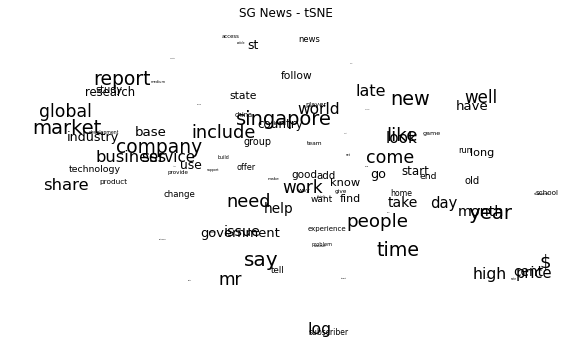

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.title('SG News - tSNE')
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

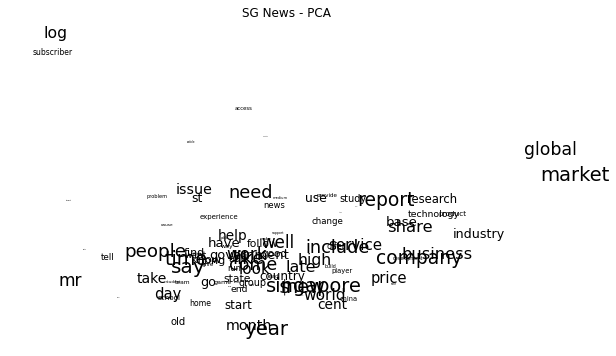

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.title('SG News - PCA')
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data[:, 0][i],reducedPCA_data[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

The documents most similar to the word 'racial', seems to show that the word is largely used either in relation to ethnic associations or to documents that emphasize the positive narratives of race. Other word-document associations seem to point to instructive documents. This is unsurprising as the corpus is of books that are supposed to "define Singapore". However, how exactly Singapore is being defined is a seperate, more interetsing question. In terms of race, it is one where "shared values" and "harmony" are emphasized. 

In [4]:
nlb_texts = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_w2v_norm.csv')

In [5]:
nlb_texts

,Unnamed: 0,links,content,no_list,tokenized_sents,normalized_sents
0,0,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'Singapore hosted the 17th Asia-Pacific E...",Singapore hosted the 17th Asia-Pacific Economi...,"[['Singapore', 'hosted', 'the', '17th', 'Asia'...","[['singapore', 'host', '17th', 'asia', 'pacifi..."
1,1,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'The Singapore Straits is among the most ...",The Singapore Straits is among the most geogra...,"[['The', 'Singapore', 'Straits', 'is', 'among'...","[['singapore', 'strait', 'geographically', 'st..."
2,2,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'On 6 February 1819, Stamford Raffles, Te...","On 6 February 1819, Stamford Raffles, Temenggo...","[['On', '6', 'February', '1819', 'Stamford', '...","[['february', 'stamford', 'raffle', 'temenggon..."
3,3,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'The Treaty of Friendship and Alliance wa...",The Treaty of Friendship and Alliance was sign...,"[['The', 'Treaty', 'of', 'Friendship', 'and', ...","[['treaty', 'friendship', 'alliance', 'sign', ..."
4,4,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'In the midst of World War I, on 15 Febru...","In the midst of World War I, on 15 February 19...","[['In', 'the', 'midst', 'of', 'World', 'War', ...","[['midst', 'world', 'war', 'february', 'right'..."
...,...,...,...,...,...,...
1926,1926,http://eresources.nlb.gov.sg/infopedia/article...,"[' by Sutherland, Duncan', 'Zena Denise Tessen...","by Sutherland, DuncanZena Denise Tessensohn n...","[['by', 'Sutherland', 'DuncanZena', 'Denise', ...","[['sutherland', 'duncanzena', 'denise', 'tesse..."
1927,1927,http://eresources.nlb.gov.sg/infopedia/article...,"['', 'Zhong Yuan Jie (中元节), also known as the ...","Zhong Yuan Jie (中元节), also known as the Hungry...","[['Zhong', 'Yuan', 'Jie', '中元节', 'also', 'know...","[['zhong', 'yuan', 'jie', '中元节', 'know', 'hung..."
1928,1928,http://eresources.nlb.gov.sg/infopedia/article...,"[' by Sim, Cheryl', 'Zhu Xu (朱绪) (b. 15 Novemb...","by Sim, CherylZhu Xu (朱绪) (b. 15 November 190...","[['by', 'Sim', 'CherylZhu', 'Xu', '朱绪'], ['b.'...","[['sim', 'cherylzhu', 'xu', '朱绪'], ['b.', 'nov..."
1929,1929,http://eresources.nlb.gov.sg/infopedia/article...,"[' by Ho, Aloysius', ""Zouk is a globally renow...","by Ho, AloysiusZouk is a globally renowned aw...","[['by', 'Ho', 'AloysiusZouk', 'is', 'a', 'glob...","[['ho', 'aloysiuszouk', 'globally', 'renowned'..."


In [6]:
keywords = ['race', 'racial', 'migrant', 'maid', 'chinese', 'malay', 'foreigner', 'immigrant']


In [7]:
keywords_class = ['chinese', 'malay', 'foreigner', 'wealth', 'wealthy', 'poor', 'lawyer', 'businessman', 'fisherman']

In [ ]:
nlb_texts['tokenized'] = nlb_texts['no_list'].apply(lambda x: lucem_illud.word_tokenize(x))
nlb_texts['normalized_sents'] = nlb_texts['tokenized'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [11]:
taggedDocs = []
for index, row in nlb_texts.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords_class if s in row['normalized_sents']]
    docKeywords.append(row['links']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_sents'], tags = docKeywords))
nlb_texts['TaggedAbstracts_class'] = taggedDocs

In [ ]:
sg_news_years['TaggedAbstracts_class']

0    ([[['today', 'final', 'instalment', 'look', 'p...
1    ([[['punggol', 'flat', 'town', 'run'], ['pungg...
2    ([[['asianscientist'], ['jan', 'magnitude'], [...
3    ([[['nasa', 'researcher', 'analyse', 'small', ...
4    ([[['late', 'stats', 'company', 'ios'], ['adop...
5    ([[['sign'], ['newsletter', 'global', 'busines...
6    ([[['user', 'menu', 'asian', 'market', 'trade'...
7    ([[['april', 'fool', 'know', 'world', 'celebra...
8    ([[['researchvector', 'inc', 'vast', 'informat...
Name: TaggedAbstracts_class, dtype: object

In [13]:

nlbD2V = gensim.models.doc2vec.Doc2Vec(nlb_texts['TaggedAbstracts_class'], size = 100) #Limiting to 100 dimensions

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
nlb_texts['TaggedAbstracts_class']

0       ([['singapore', 'host', '17th', 'asia', 'pacif...
1       ([['singapore', 'strait', 'geographically', 's...
2       ([['february', 'stamford', 'raffle', 'temenggo...
3       ([['treaty', 'friendship', 'alliance', 'sign',...
4       ([['midst', 'world', 'war', 'february', 'right...
                              ...                        
1926    ([['sutherland', 'duncanzena', 'denise', 'tess...
1927    ([['zhong', 'yuan', 'jie', '中元节', 'know', 'hun...
1928    ([['sim', 'cherylzhu', 'xu', '朱绪'], ['b.', 'no...
1929    ([['ho', 'aloysiuszouk', 'globally', 'renowned...
1930    ([['sim'], ['cherylzubir', 'say', 'b.', 'july'...
Name: TaggedAbstracts_class, Length: 1931, dtype: object

In [ ]:
nlbD2V.docvecs.most_similar([ nlbD2V['migrant'] ], topn=5 )

[('http://eresources.nlb.gov.sg/infopedia/articles/SIP_1806_2011-03-30.html',
  0.5846099853515625),
 ('http://eresources.nlb.gov.sg/infopedia/articles/SIP_190_2005-01-03.html',
  0.5832808017730713),
 ('http://eresources.nlb.gov.sg/infopedia/articles/SIP_1805_2011-03-30.html',
  0.5725691318511963),
 ('http://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-05-16_111918.html',
  0.549446702003479),
 ('http://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-06-05_182217.html',
  0.5322171449661255)]

In [ ]:
nlbD2V.most_similar( [ nlbD2V.docvecs['http://eresources.nlb.gov.sg/infopedia/articles/SIP_1806_2011-03-30.html'] ], topn=5) 

[('beef', 0.9453864097595215),
 ('noodles', 0.9243083000183105),
 ('chicken', 0.9126290678977966),
 ('condiments', 0.9106060266494751),
 ('roasted', 0.9030678868293762)]

In [ ]:
for link, _ in nlbD2V.docvecs.most_similar([ nlbD2V['migrant'] ], topn=5 ):
  print(nlbD2V.most_similar( [ nlbD2V.docvecs[link] ], topn=5))

[('beef', 0.9453864097595215), ('noodles', 0.9243083000183105), ('chicken', 0.9126290678977966), ('condiments', 0.9106060266494751), ('roasted', 0.9030678868293762)]
[('1940–1942', 0.6470588445663452), ('9–13', 0.6381344199180603), ('secrets', 0.632818341255188), ('trojan', 0.6041871309280396), ('migrant', 0.5832808017730713)]
[('laksa', 0.8321055769920349), ('floss', 0.8027156591415405), ('kut', 0.7899863719940186), ('lijie', 0.7788800597190857), ('flavours', 0.7752119302749634)]
[('omelette', 0.9517728090286255), ('kambing', 0.9436154961585999), ('minced', 0.9326947331428528), ('blanched', 0.9177953600883484), ('shrimp', 0.9156346321105957)]
[('laksa', 0.8484163284301758), ('kut', 0.8182204961776733), ('bak', 0.7931646704673767), ('chicken', 0.7833040952682495), ('nonya', 0.780837893486023)]


In [ ]:
for link, _ in nlbD2V.docvecs.most_similar([ nlbD2V['maid'] ], topn=5 ):
  print(nlbD2V.most_similar( [ nlbD2V.docvecs[link] ], topn=5))

[('pleaded', 0.9399519562721252), ('acquittal', 0.9364447593688965), ('prosecution', 0.9275745153427124), ('forgery', 0.9275147914886475), ('lowe', 0.9218704700469971)]
[('lowe', 0.979999303817749), ('scripps', 0.9560461044311523), ('boeing', 0.9422526359558105), ('driver', 0.9409321546554565), ('struck', 0.9403815865516663)]
[('robbery', 0.9455019235610962), ('hanged', 0.9405598044395447), ('acquittal', 0.9354865550994873), ('guilty', 0.933962881565094), ('murder', 0.9284223318099976)]
[('gum', 0.9512679576873779), ('brokerages', 0.933706521987915), ('carwashers', 0.9323645830154419), ('conclusive', 0.9278178811073303), ('stern', 0.9248866438865662)]
[('witness', 0.9287196397781372), ('imuthu', 0.926024854183197), ('flor', 0.918586790561676), ('verdict', 0.9115680456161499), ('murderer', 0.9059770107269287)]


In [ ]:
for link, _ in nlbD2V.docvecs.most_similar([ nlbD2V['filipino'] ], topn=5 ):
  print(nlbD2V.most_similar( [ nlbD2V.docvecs[link] ], topn=5))

[('nights', 0.934481680393219), ('upright', 0.9334752559661865), ('sacrificed', 0.9330794215202332), ('neckline', 0.9308224320411682), ('drummer', 0.9290393590927124)]
[('singular', 0.9184375405311584), ('anthologised', 0.9082396030426025), ('penned', 0.9024395942687988), ('fascist', 0.8960596919059753), ('lau%20siew%20mei&f', 0.8919566869735718)]
[('navaratri', 0.9555346369743347), ('shakti', 0.9228712916374207), ('hindus', 0.9161770939826965), ('vishnu', 0.9052103757858276), ('pongal', 0.9037917256355286)]
[('lau%20siew%20mei&f', 0.9043108224868774), ('amrit', 0.9041582345962524), ('titular', 0.9038580656051636), ('kuik', 0.9006264209747314), ('dentist', 0.8931705951690674)]
[('packard', 0.912101149559021), ('amrit', 0.9118075966835022), ('drummer', 0.9014647006988525), ('fitzgerald', 0.9002077579498291), ('screenplay', 0.8948562741279602)]


In [ ]:
for link, _ in nlbD2V.docvecs.most_similar([ nlbD2V['worker'] ], topn=5 ):
  print(nlbD2V.most_similar( [ nlbD2V.docvecs[link] ], topn=5))

[('polled', 0.899377703666687), ('ncmp', 0.885289192199707), ('socialists', 0.8779379725456238), ('dismissed', 0.8759163022041321), ('councillors', 0.8704133629798889)]
[('stomach', 0.9565969109535217), ('mccrea', 0.9522206783294678), ('ramsbottom', 0.9432774782180786), ('pleaded', 0.9268383383750916), ('conceal', 0.9265730381011963)]
[('chesed', 0.8648806810379028), ('bells', 0.8488095998764038), ('flown', 0.8484833240509033), ('ius', 0.8447318077087402), ('s$15,000', 0.8366730809211731)]
[('robbery', 0.9455019235610962), ('hanged', 0.9405598044395447), ('acquittal', 0.9354865550994873), ('guilty', 0.933962881565094), ('murder', 0.9284223318099976)]
[('ambrose', 0.936805009841919), ('sundaresh', 0.9139037132263184), ('bench', 0.910881757736206), ('s$15,000', 0.894149661064148), ('troop', 0.8933525085449219)]


In [ ]:
for link, _ in nlbD2V.docvecs.most_similar([ nlbD2V['racial'] ], topn=5 ):
  print(nlbD2V.most_similar( [ nlbD2V.docvecs[link] ], topn=5))

[('harmony', 0.8959510326385498), ('racial', 0.8779213428497314), ('religious', 0.6891855597496033), ('campaign', 0.6828620433807373), ('debate', 0.6658889651298523)]
[('values', 0.8359688520431519), ('shared', 0.797399640083313), ('debate', 0.7958583831787109), ('interreligious', 0.7932484149932861), ('racial', 0.7827901840209961)]
[('sepak', 0.8485502004623413), ('reaffirm', 0.8359100818634033), ('amrit', 0.8308503031730652), ('takraw', 0.8267809152603149), ('reminding', 0.813766360282898)]
[('stakeholders', 0.864626944065094), ('reactions', 0.833246111869812), ('cwo', 0.8280370235443115), ('educating', 0.8251535892486572), ('disincentives', 0.8208382725715637)]
[('flags', 0.8892203569412231), ('correctly', 0.8755456209182739), ('flag', 0.8614029884338379), ('manner', 0.8607367873191833), ('mascot', 0.8468620777130127)]


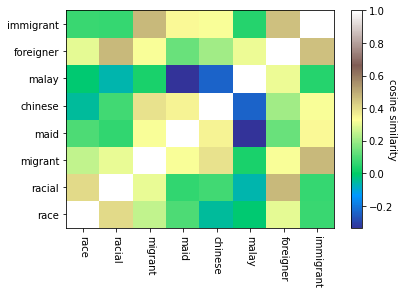

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

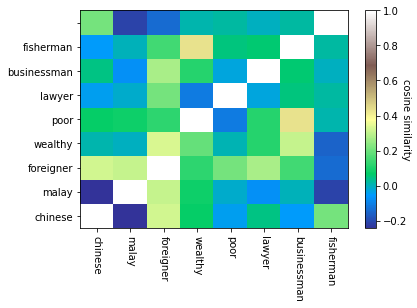

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:
targetDocs = nlb_texts['links'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = nlbD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, nlbD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

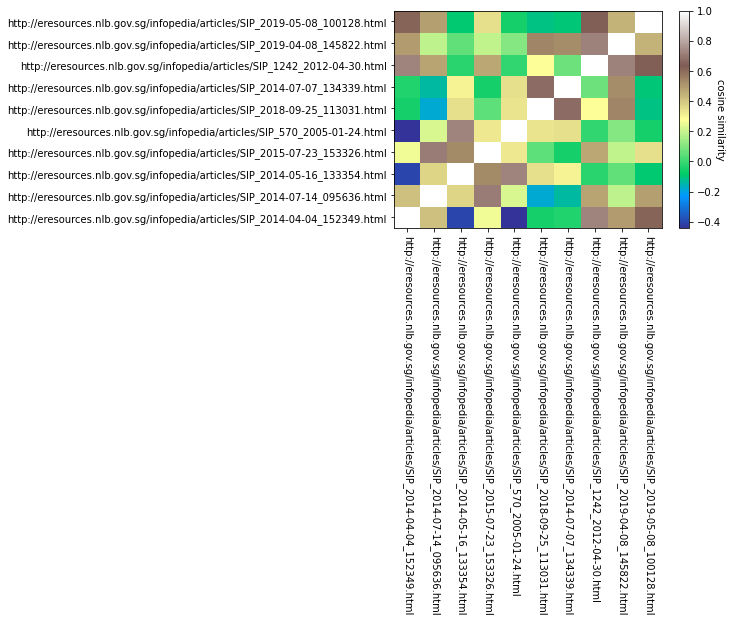

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = nlbD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, nlbD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

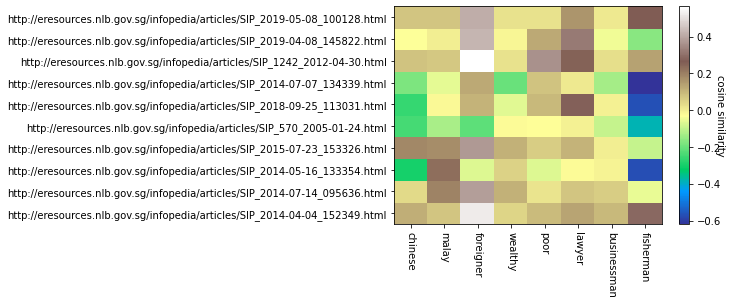

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
nlbD2V.save('nlbD2V')

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

The projections unsurpsingly show that even in library-published books, there are gendered, racialized, and classed. Interestingly, despite the library corpus not having mentions of racist or racism in the text, the corpora presents the most distinct variations in the race dimension. This suggests that the constitution of the articles and books in these corpora privilege a more static and ontologically-stable conception of race.  

In [ ]:
sgnewsW2V = gensim.models.word2vec.Word2Vec(sg_news_years['normalized_sents'].sum(), sg=0)

In [ ]:
#words to create dimensions
nlbTargetWords = ['man', 'woman', 'malay','malays', 'chinese', 'indian', 'rich', 'expensive', 'wealthy', 'poor', 'cheap', 'inexpensive', 'foreigner', 'migrant', 'immigrant', 'wealth', 'education']
#words we will be mapping
nlbTargetWords += ["doctor","lawyer","fisherman","academic", "helper","entrepreneur","musician", "writer", "banker","poet","nurse", "polytechnic", "university", "conflict", "criminal"]


wordsSubMatrix = []
for word in nlbTargetWords:
    wordsSubMatrix.append(sgnewsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsnlb= sklearn.decomposition.PCA(n_components = 32).fit(wordsSubMatrix)
reducedPCA_datanlb= pcaWordsnlb.transform(wordsSubMatrix)
#T-SNE is theoretically etter, but you should experiment
tsneWordsnlb= sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_datanlb)

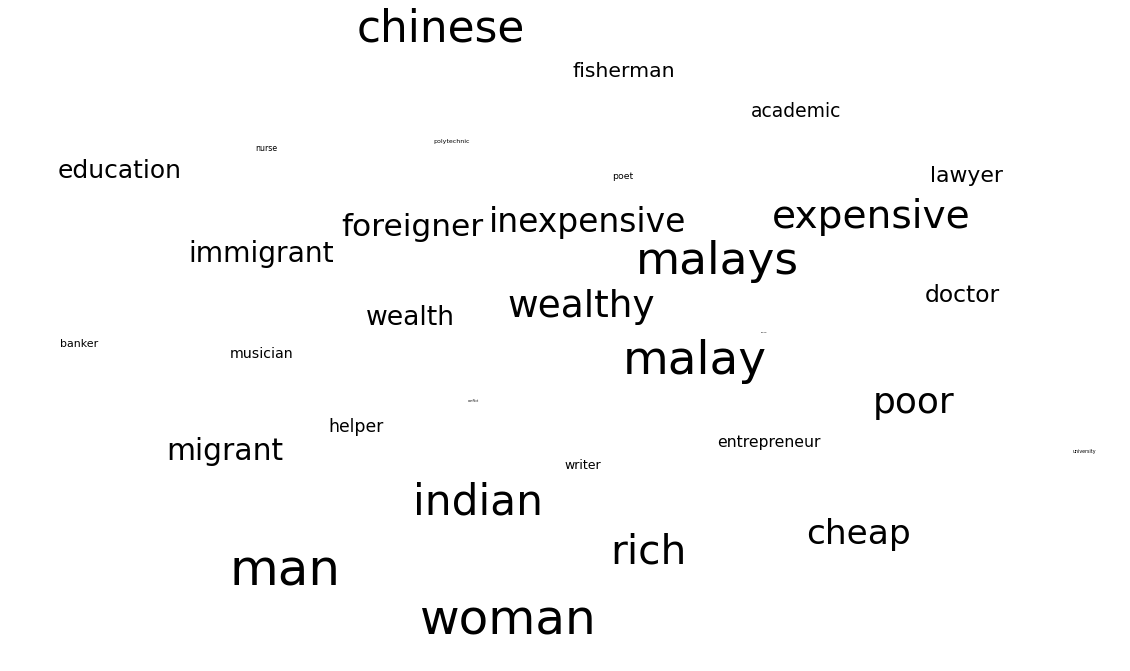

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsnlb[:, 0], tsneWordsnlb[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(nlbTargetWords):
    ax.annotate(word, (tsneWordsnlb[:, 0][i],tsneWordsnlb[:, 1][i]), size =  50 * (len(nlbTargetWords) - i) / len(nlbTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
Gender = dimension(sgnewsW2V, ['man'], ['woman'])
Race = dimension(sgnewsW2V,  ['malay', 'malays'], ['chinese'])
Class = dimension(sgnewsW2V, ['rich', 'expensive', 'wealthy'], ['poor', 'cheap', 'inexpensive'])

In [ ]:
Occupations = ["doctor","lawyer","scientist", "helper","maid","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["salad", "beer", "wine", "rice", "noodle"]

Sports  = ["basketball", "soccer", "tennis", "golf", "hockey", "soccer"]

Adjectives = ["lazy", "smart", "hardworking", "dumb", "friendly", "angry", "unpleasant", "cowardly", "intelligent", "loud", "greedy", "violent", "lying", "ugly"]

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    a = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(sgnewsW2V[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(sgnewsW2V[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(sgnewsW2V[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
        # a.append(sklearn.metrics.pairwise.cosine_similarity(sgnewsW2V[word].reshape(1,-1), Adjectives.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

In [ ]:
OCCdf = makeDF(sgnewsW2V, Occupations) 
Fooddf = makeDF(sgnewsW2V, Foods)
Sportsdf = makeDF(sgnewsW2V, Sports)
# Adjdf = makeDF(sgnewsW2V, Adjectives)

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

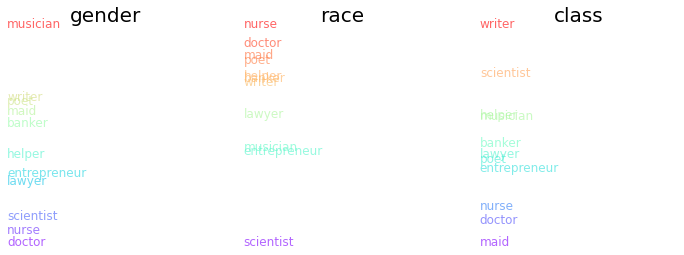

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

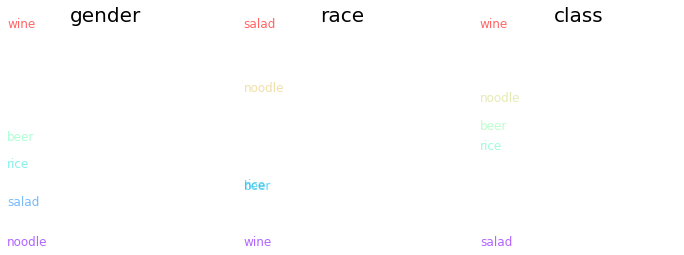

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

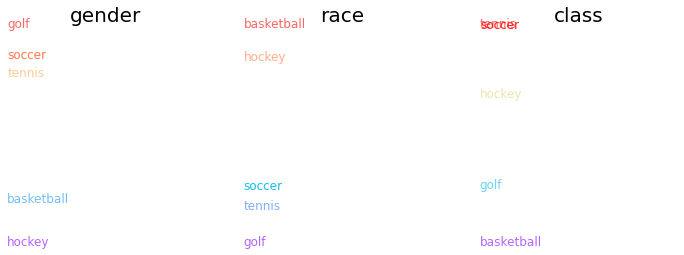

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

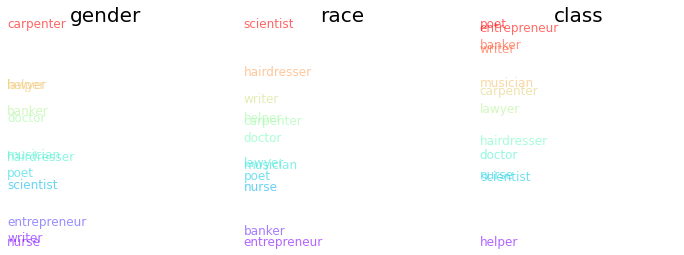

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

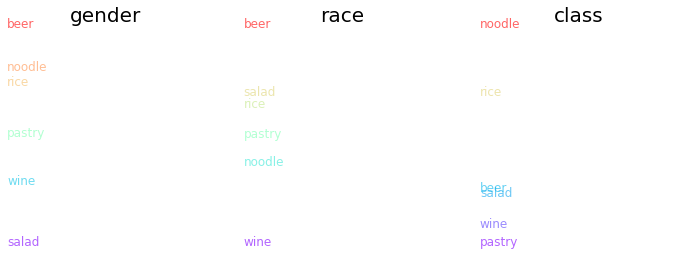

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

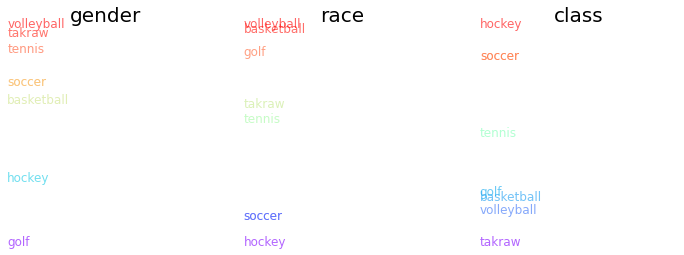

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 4b*</font>

<font color="red">**Do only 4a or 4b.** Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space? 

 Across the words that I checked, there does not seem to be much variation in how the word use changed. This is likely because the corpus examined was that of newspapers which generally maintain publishing style. However, of interest is the use of the word race, which showed the most change amongst the words. However, this does not semantically distinguish between other meanings of the wword race which explains this variation. 

In [ ]:
news_years = {}

for year, text in zip(sg_news_years['year'], sg_news_years['texts']): 
  if year not in news_years: 
    news_years[year] = []
  for i in text: 
      print(len(i), year)
      news_years[year].append(lucem_illud.normalizeTokens(i[:1500000]))

125177 10
111287 10
221584 10
273403 10
169588 10
247279 10
122531 10
147264 10
156061 10
211497 10
119424 10
117298 10
186675 11
158463 11
346197 11
649802 11
674891 11
792304 11
826386 11
946221 11
976247 11
710270 11
690647 11
743639 11
846048 12
864277 12
912766 12
935672 12
986171 12
1008967 12
1118690 12
900191 12
804605 12
1184814 12
1235628 12
861808 12
1070976 13
1151116 13
1454089 13
1635330 13
1989817 13
1901403 13
1835819 13
1652182 13
2046247 13
2343234 13
1839532 13
1987964 13
1991309 14
1758334 14
2492564 14
2289250 14
2662826 14
3123018 14
3595984 14
3640631 14
4286754 14
5190468 14
4185462 14
3967408 14
5920331 15
6046350 15
7404192 15
8532373 15
9470886 15
8748451 15
10377991 15
9274357 15
10139191 15
12477515 15
15620867 15
26884674 15
24462085 16
14747304 16
32821460 16
24841231 16
30093750 16
27643881 16
20240173 16
34259681 16
36717990 16
37102317 16
48398300 18
49647373 18
38777402 18
59807409 18
37745087 18
63964353 18
74990906 18
63254024 18
63697656 18
7321805

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0: 
        embeddings_raw = rawModels(df, category, text_column_name, sort)
        
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(sg_news_years, 'year')

In [ ]:
rawEmbeddings.items()

dict_items([(10, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1d2d0>), (11, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d2d8d0>), (12, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9db8510>), (13, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9db8690>), (14, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1bad0>), (15, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9cc1110>), (16, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9cd3410>), (18, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9cdc590>), (19, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce5850>)])

In [ ]:
comparedEmbeddings.items()

dict_items([(10, [<gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1d2d0>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce8dd0>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1d8d0>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1ba10>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9d1f890>, <gensim.models.word2vec.Word2Vec object at 0x7f3ab78838d0>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9cd3190>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9cdc450>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce5790>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce82d0>]), (11, [<gensim.models.word2vec.Word2Vec object at 0x7f3aa9d2d8d0>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce8810>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce8650>, <gensim.models.word2vec.Word2Vec object at 0x7f3ab5758d10>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce8f90>, <gensim.models.word2vec.Word2Vec object at 0x7f3aa9ce8210>, <gensim.models

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

malaysia


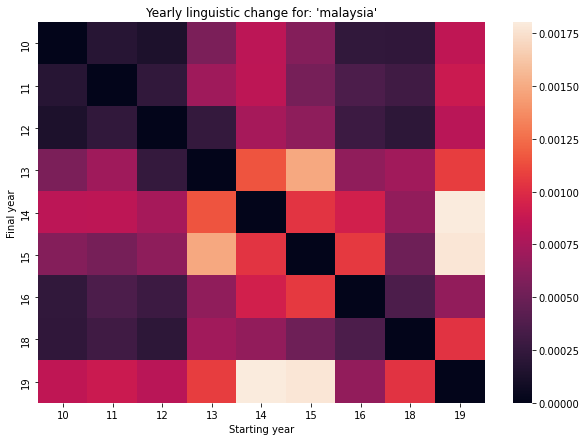

In [ ]:
targetWord = 'malaysia'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

race


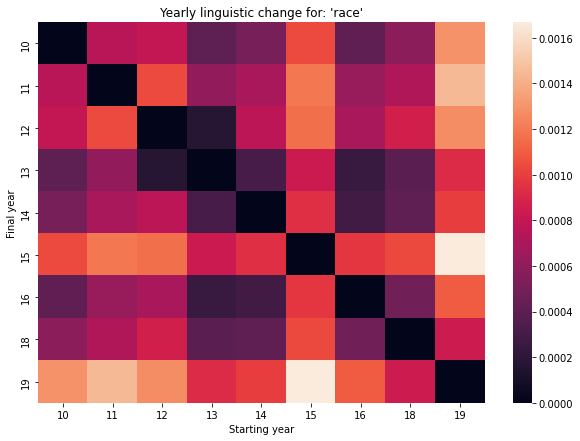

In [ ]:
targetWord = 'race'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

singapore


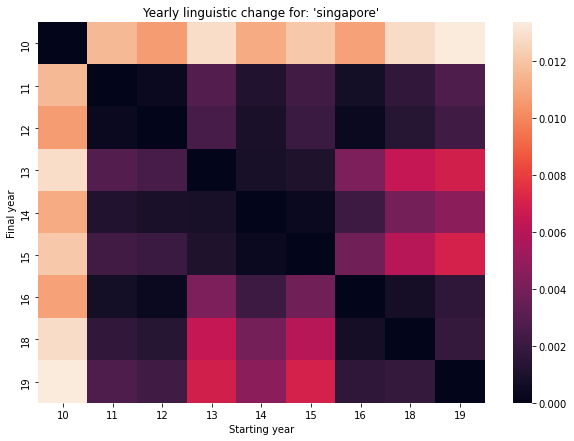

In [ ]:
targetWord = 'singapore'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

election


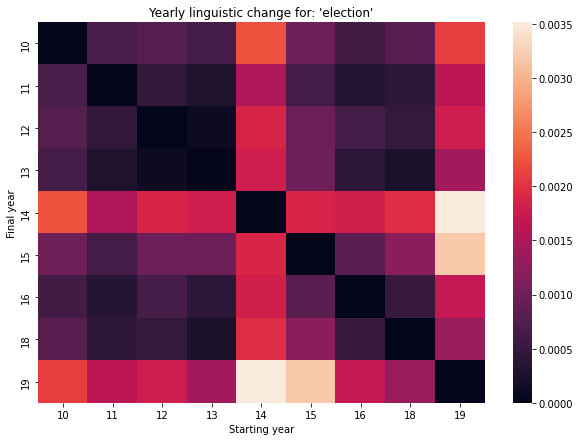

In [ ]:
targetWord = 'election'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 1121 words to compare


In [ ]:
wordDivergences[:20]

[('matt', 2.586593806743622),
 ('email', 2.4003475308418274),
 ('examine', 2.2912360429763794),
 ('access', 2.047857940196991),
 ('independent', 1.9235464334487915),
 ('enter', 1.65854412317276),
 ('issue', 1.6508589386940002),
 ('opinion', 1.6024968028068542),
 ('reflect', 1.554094910621643),
 ('st', 1.4216377139091492),
 ('online', 1.2915397882461548),
 ('digital', 1.2582145929336548),
 ('strait', 1.243684709072113),
 ('receive', 1.2266645431518555),
 ('aim', 1.2101364731788635),
 ('idea', 1.1665040850639343),
 ('post', 1.1546939015388489),
 ('article', 1.1417769193649292),
 ('problem', 1.1184769868850708),
 ('need', 1.092113196849823)]

In [ ]:
wordDivergences[-20:]

[('add', 0.002949535846710205),
 ('line', 0.0029427409172058105),
 ('act', 0.0029074549674987793),
 ('hand', 0.002841472625732422),
 ('support', 0.002834796905517578),
 ('get', 0.0027989745140075684),
 ('allow', 0.002792954444885254),
 ('turn', 0.002774477005004883),
 ('accord', 0.0027552247047424316),
 ('dr', 0.0027094483375549316),
 ('give', 0.0025202035903930664),
 ('centre', 0.0025016069412231445),
 ('japan', 0.002488851547241211),
 ('today', 0.002484560012817383),
 ('mean', 0.0024707913398742676),
 ('find', 0.0024453401565551758),
 ('case', 0.0023734569549560547),
 ('little', 0.002327859401702881),
 ('able', 0.0022253990173339844),
 ('area', 0.0020633339881896973)]

area


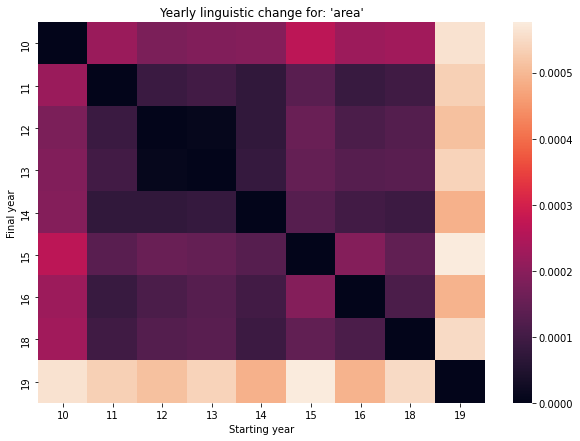

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

independent


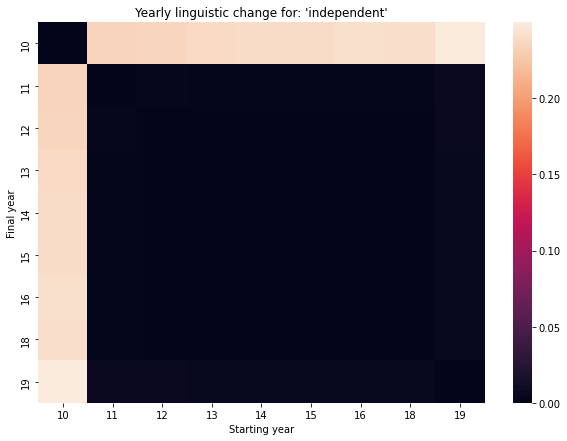

In [ ]:
targetWord = wordDivergences[4][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()